<a href="https://colab.research.google.com/github/Yeehui13/Financial-Time-Series/blob/main/Financial_Time_Series_(Lim_Yee_Hui).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
#mpl.rcParamas['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'



<ipython-input-1-a0f97616cff5>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving tr_eikon_eod_data.csv to tr_eikon_eod_data.csv


In [ ]:
import pandas as pd
import io

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['tr_eikon_eod_data.csv'].decode('cp1252')))


### Summary Statistic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2216 non-null   object 
 1   AAPL.O  2138 non-null   float64
 2   MSFT.O  2138 non-null   float64
 3   INTC.O  2138 non-null   float64
 4   AMZN.O  2138 non-null   float64
 5   GS.N    2138 non-null   float64
 6   SPY     2138 non-null   float64
 7   .SPX    2138 non-null   float64
 8   .VIX    2138 non-null   float64
 9   EUR=    2216 non-null   float64
 10  XAU=    2211 non-null   float64
 11  GDX     2138 non-null   float64
 12  GLD     2138 non-null   float64
dtypes: float64(12), object(1)
memory usage: 225.2+ KB


In [ ]:
df.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [ ]:
df.mean()

<ipython-input-19-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [ ]:
df.max()

Date      2018-06-29
AAPL.O        193.98
MSFT.O        102.49
INTC.O         57.08
AMZN.O       1750.08
GS.N          273.38
SPY           286.58
.SPX         2872.87
.VIX            48.0
EUR=          1.4826
XAU=         1898.99
GDX            66.63
GLD           184.59
dtype: object

In [ ]:
df.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
1,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
3,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
4,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [ ]:
df.tail()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
2211,2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2212,2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2213,2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2214,2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2215,2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

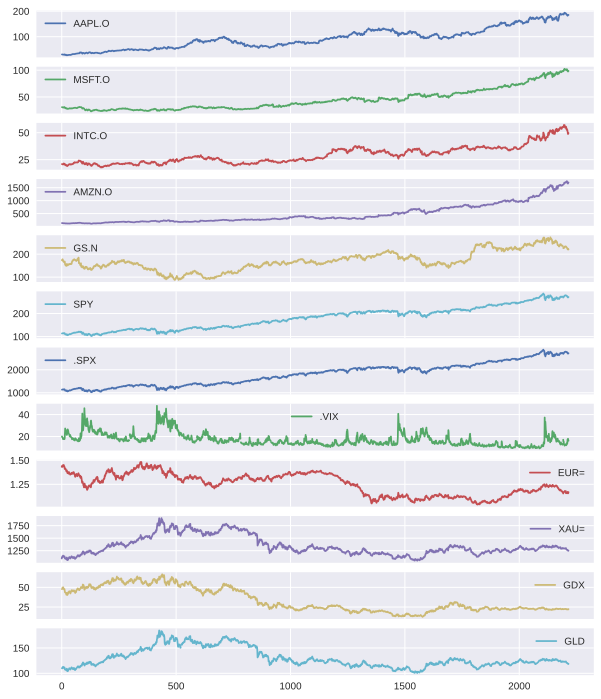

In [ ]:
df.plot(figsize=(10,12),subplots=True)

In [ ]:
df.aggregate([min,
              np.mean,
              np.std,
              np.median,
              max]
).round(2)

<ipython-input-24-0abe099c5f25>:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.aggregate([min,


,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,2010-01-01,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,NaN,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,NaN,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,NaN,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,2018-06-29,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


## Changes over Time

In [ ]:
df = pd.read_csv("tr_eikon_eod_data.csv")
df = df.iloc[: , 1:] #drop first column
df.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
3,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
4,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [ ]:
df.diff().tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
2211,-2.75,-2.02,-1.79,-52.52,-4.48,-3.74,-37.81,3.56,0.0047,-3.49,-0.17,-0.45
2212,2.26,0.69,-1.04,27.94,0.04,0.60,5.99,-1.41,-0.0057,-6.36,-0.06,-0.63
2213,-0.27,-1.54,-0.91,-30.58,-1.40,-2.25,-23.43,1.99,-0.0093,-7.02,-0.14,-0.68
2214,1.34,1.09,0.49,40.94,3.24,1.54,16.68,-1.06,0.0015,-3.74,0.12,-0.36
2215,-0.39,-0.02,0.46,-1.65,-2.85,0.39,2.06,-0.76,0.0116,4.37,0.38,0.43


In [ ]:
df.diff().tail(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
2206,-0.10,0.73,-1.89,7.82,-0.53,-0.57,-5.91,0.33,0.0015,-1.0900,0.04,-0.23
2207,-3.05,0.00,-0.29,10.99,-3.07,-1.06,-11.16,1.04,-0.0034,-3.5400,-0.22,-0.31
2208,0.81,1.01,0.53,15.30,-0.50,0.47,4.73,-0.56,-0.0018,-6.6700,-0.13,-0.54
2209,-1.04,-0.73,-1.27,-19.86,-0.84,-1.73,-17.56,1.85,0.0031,-0.8899,-0.01,-0.21
2210,-0.54,-0.73,0.31,-14.55,-0.96,0.50,5.12,-0.87,0.0054,1.6799,0.27,0.29
2211,-2.75,-2.02,-1.79,-52.52,-4.48,-3.74,-37.81,3.56,0.0047,-3.4900,-0.17,-0.45
2212,2.26,0.69,-1.04,27.94,0.04,0.60,5.99,-1.41,-0.0057,-6.3600,-0.06,-0.63
2213,-0.27,-1.54,-0.91,-30.58,-1.40,-2.25,-23.43,1.99,-0.0093,-7.0200,-0.14,-0.68
2214,1.34,1.09,0.49,40.94,3.24,1.54,16.68,-1.06,0.0015,-3.7400,0.12,-0.36
2215,-0.39,-0.02,0.46,-1.65,-2.85,0.39,2.06,-0.76,0.0116,4.3700,0.38,0.43


In [ ]:
df.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

In [ ]:
df.diff().describe()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2215.000000,2205.000000,2061.000000,2061.000000
mean,0.064737,0.031246,0.013540,0.706608,0.028224,0.072103,0.732659,-0.019583,-0.000119,0.041887,-0.015071,-0.003455
std,1.489832,0.677953,0.470381,10.095714,2.647548,1.563763,15.617626,1.660809,0.007302,13.974956,0.780550,1.380754
min,-9.072134,-4.600000,-2.980000,-66.280000,-23.570000,-11.520000,-113.190000,-12.940000,-0.034500,-125.600000,-4.980000,-12.640000
25%,-0.599999,-0.265000,-0.210000,-2.910000,-1.430000,-0.590000,-5.860000,-0.690000,-0.004300,-6.600000,-0.410000,-0.650000
50%,0.050000,0.010000,0.015000,0.330000,0.060000,0.100000,0.970000,-0.090000,0.000100,0.300000,-0.010000,0.040000
75%,0.768571,0.310000,0.240000,3.920000,1.480000,0.890000,8.690000,0.500000,0.004000,7.020000,0.380100,0.660000
max,7.830000,6.600000,4.780000,128.520000,10.710000,7.190000,72.900000,20.010000,0.032700,66.940000,3.950000,5.970000


In [ ]:
df.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
3,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
4,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


In [ ]:
df.pct_change().round(3).tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
2211,-0.015,-0.020,-0.034,-0.031,-0.020,-0.014,-0.014,0.259,0.004,-0.003,-0.008,-0.004
2212,0.012,0.007,-0.021,0.017,0.000,0.002,0.002,-0.081,-0.005,-0.005,-0.003,-0.005
2213,-0.001,-0.016,-0.018,-0.018,-0.006,-0.008,-0.009,0.125,-0.008,-0.006,-0.006,-0.006
2214,0.007,0.011,0.010,0.025,0.015,0.006,0.006,-0.059,0.001,-0.003,0.006,-0.003
2215,-0.002,-0.000,0.009,-0.001,-0.013,0.001,0.001,-0.045,0.010,0.004,0.017,0.004


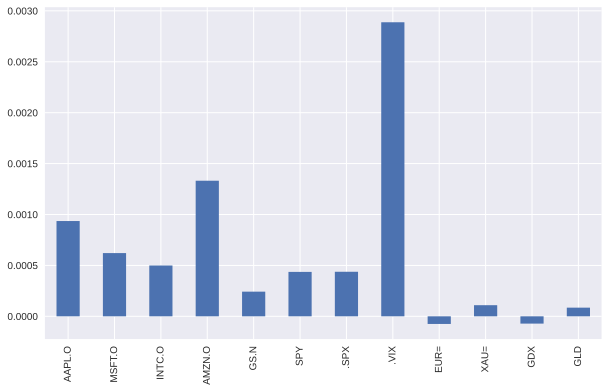

## Resampling

In [ ]:
df_sample = pd.read_csv("tr_eikon_eod_data.csv", index_col=0, parse_dates=True)


In [ ]:
df_sample.resample('1w', label='right').last().head()
# one week

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [ ]:
df_sample.resample('1m', label='right').last().head()
#one month

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881
